In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.metrics import mean_squared_error
from math import sqrt

In [2]:
train = pd.read_csv("../data/schemas/warm_up/TrainSet.csv", sep=",")
validation = pd.read_csv("../data/schemas/warm_up/ValidationSet.csv", sep=",")
test = pd.read_csv("../data/schemas/warm_up/TestSet.csv", sep=",")
carbon_mlp = pd.read_csv("../data/results/carbon_mlp.csv", sep=",", header=None)
carbon_lstm = pd.read_csv("../data/results/carbon_lstm.csv", sep=",", header=None)
carbon_gru = pd.read_csv("../data/results/carbon_gru.csv", sep=",", header=None)
solar_mlp = pd.read_csv("../data/results/solar_mlp.csv", sep=",", header=None)
solar_lstm = pd.read_csv("../data/results/solar_lstm.csv", sep=",", header=None)
solar_gru = pd.read_csv("../data/results/solar_gru.csv", sep=",", header=None)

In [3]:
independent_variables = ["Hour_1"]
columns_to_predict = ["kg_CO2/kWh", "Avg solar generation"]
NUM_OF_TIMESTEPS_INPUT = 48
NUM_OF_TIMESTEPS_OUTPUT = 24

# Split the X and Y for all sets

# Train set
X_train_default = train[independent_variables]
Y_train_default = train[columns_to_predict]

# Validation set, also include the data from train that was used only as output to get more datapoints
X_val_default = pd.concat([X_train_default.tail(NUM_OF_TIMESTEPS_OUTPUT), validation[independent_variables]], ignore_index=True)
Y_val_default = pd.concat([Y_train_default.tail(NUM_OF_TIMESTEPS_OUTPUT), validation[columns_to_predict]], ignore_index=True)

# Test set, also include the data from train that was used only as output to get more datapoints
X_test_default = pd.concat([X_val_default.tail(NUM_OF_TIMESTEPS_OUTPUT), test[independent_variables]], ignore_index=True)
Y_test_default = pd.concat([Y_val_default.tail(NUM_OF_TIMESTEPS_OUTPUT), test[columns_to_predict]], ignore_index=True)

NUM_OF_ROWS_TRAIN, NUM_OF_FEATURES = X_train_default.shape

In [4]:
# Function to prepare the data into batches that will be passed into the model

def create_sequences(input_data, output_data, timesteps_input, timesteps_output):
    sequences, targets = [], []
    for i in range(len(input_data) - timesteps_input - timesteps_output + 1):
        seq = input_data[i:i + timesteps_input]
        target = output_data[i + timesteps_input: i + timesteps_input + timesteps_output]
        sequences.append(seq)
        targets.append(target)

    return np.array(sequences), np.array(targets)

In [5]:
X_test, Y_test = create_sequences(X_test_default, Y_test_default, NUM_OF_TIMESTEPS_INPUT, NUM_OF_TIMESTEPS_OUTPUT)
print(len(Y_test))

25


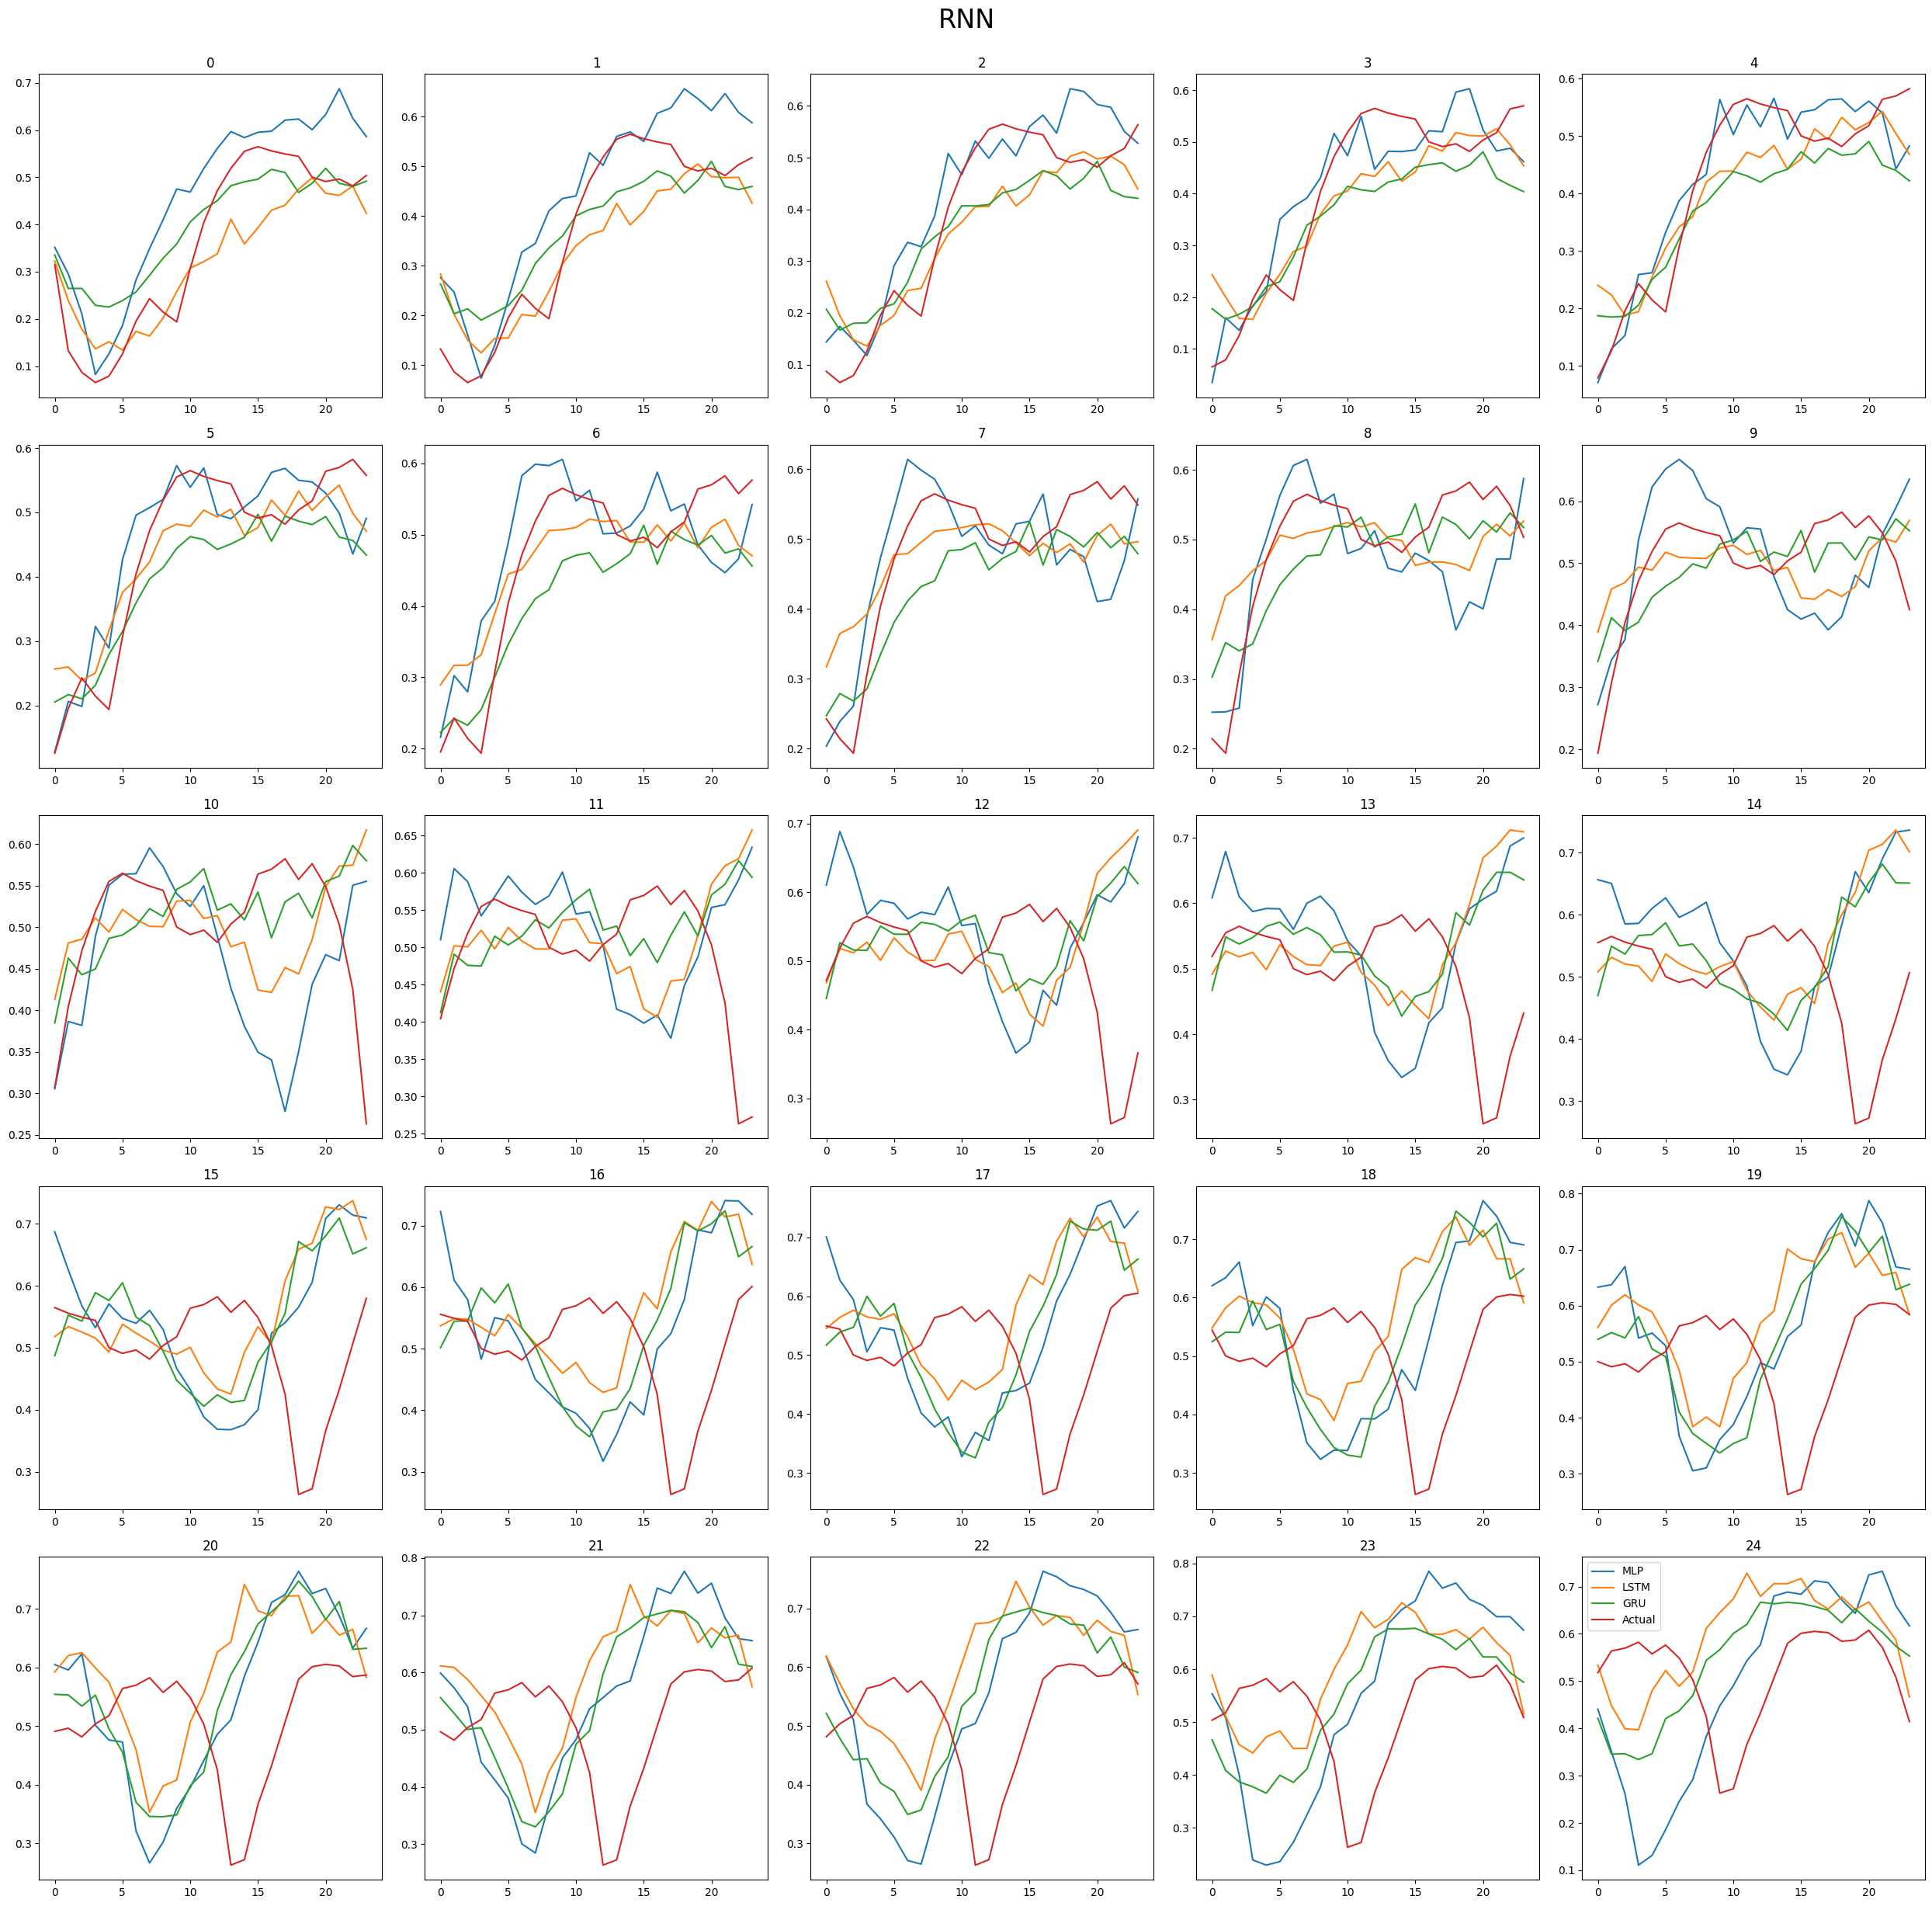

In [6]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.flatten()

for i in range(len(Y_test)):
    ax = axs[i]
    ax.plot(carbon_mlp[i], label="MLP")
    ax.plot(carbon_lstm[i], label="LSTM")
    ax.plot(carbon_gru[i], label="GRU")
    ax.plot(Y_test[i, :, 0], label="Actual")
    ax.title.set_text(i)

fig.suptitle("RNN", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.legend()
plt.show()

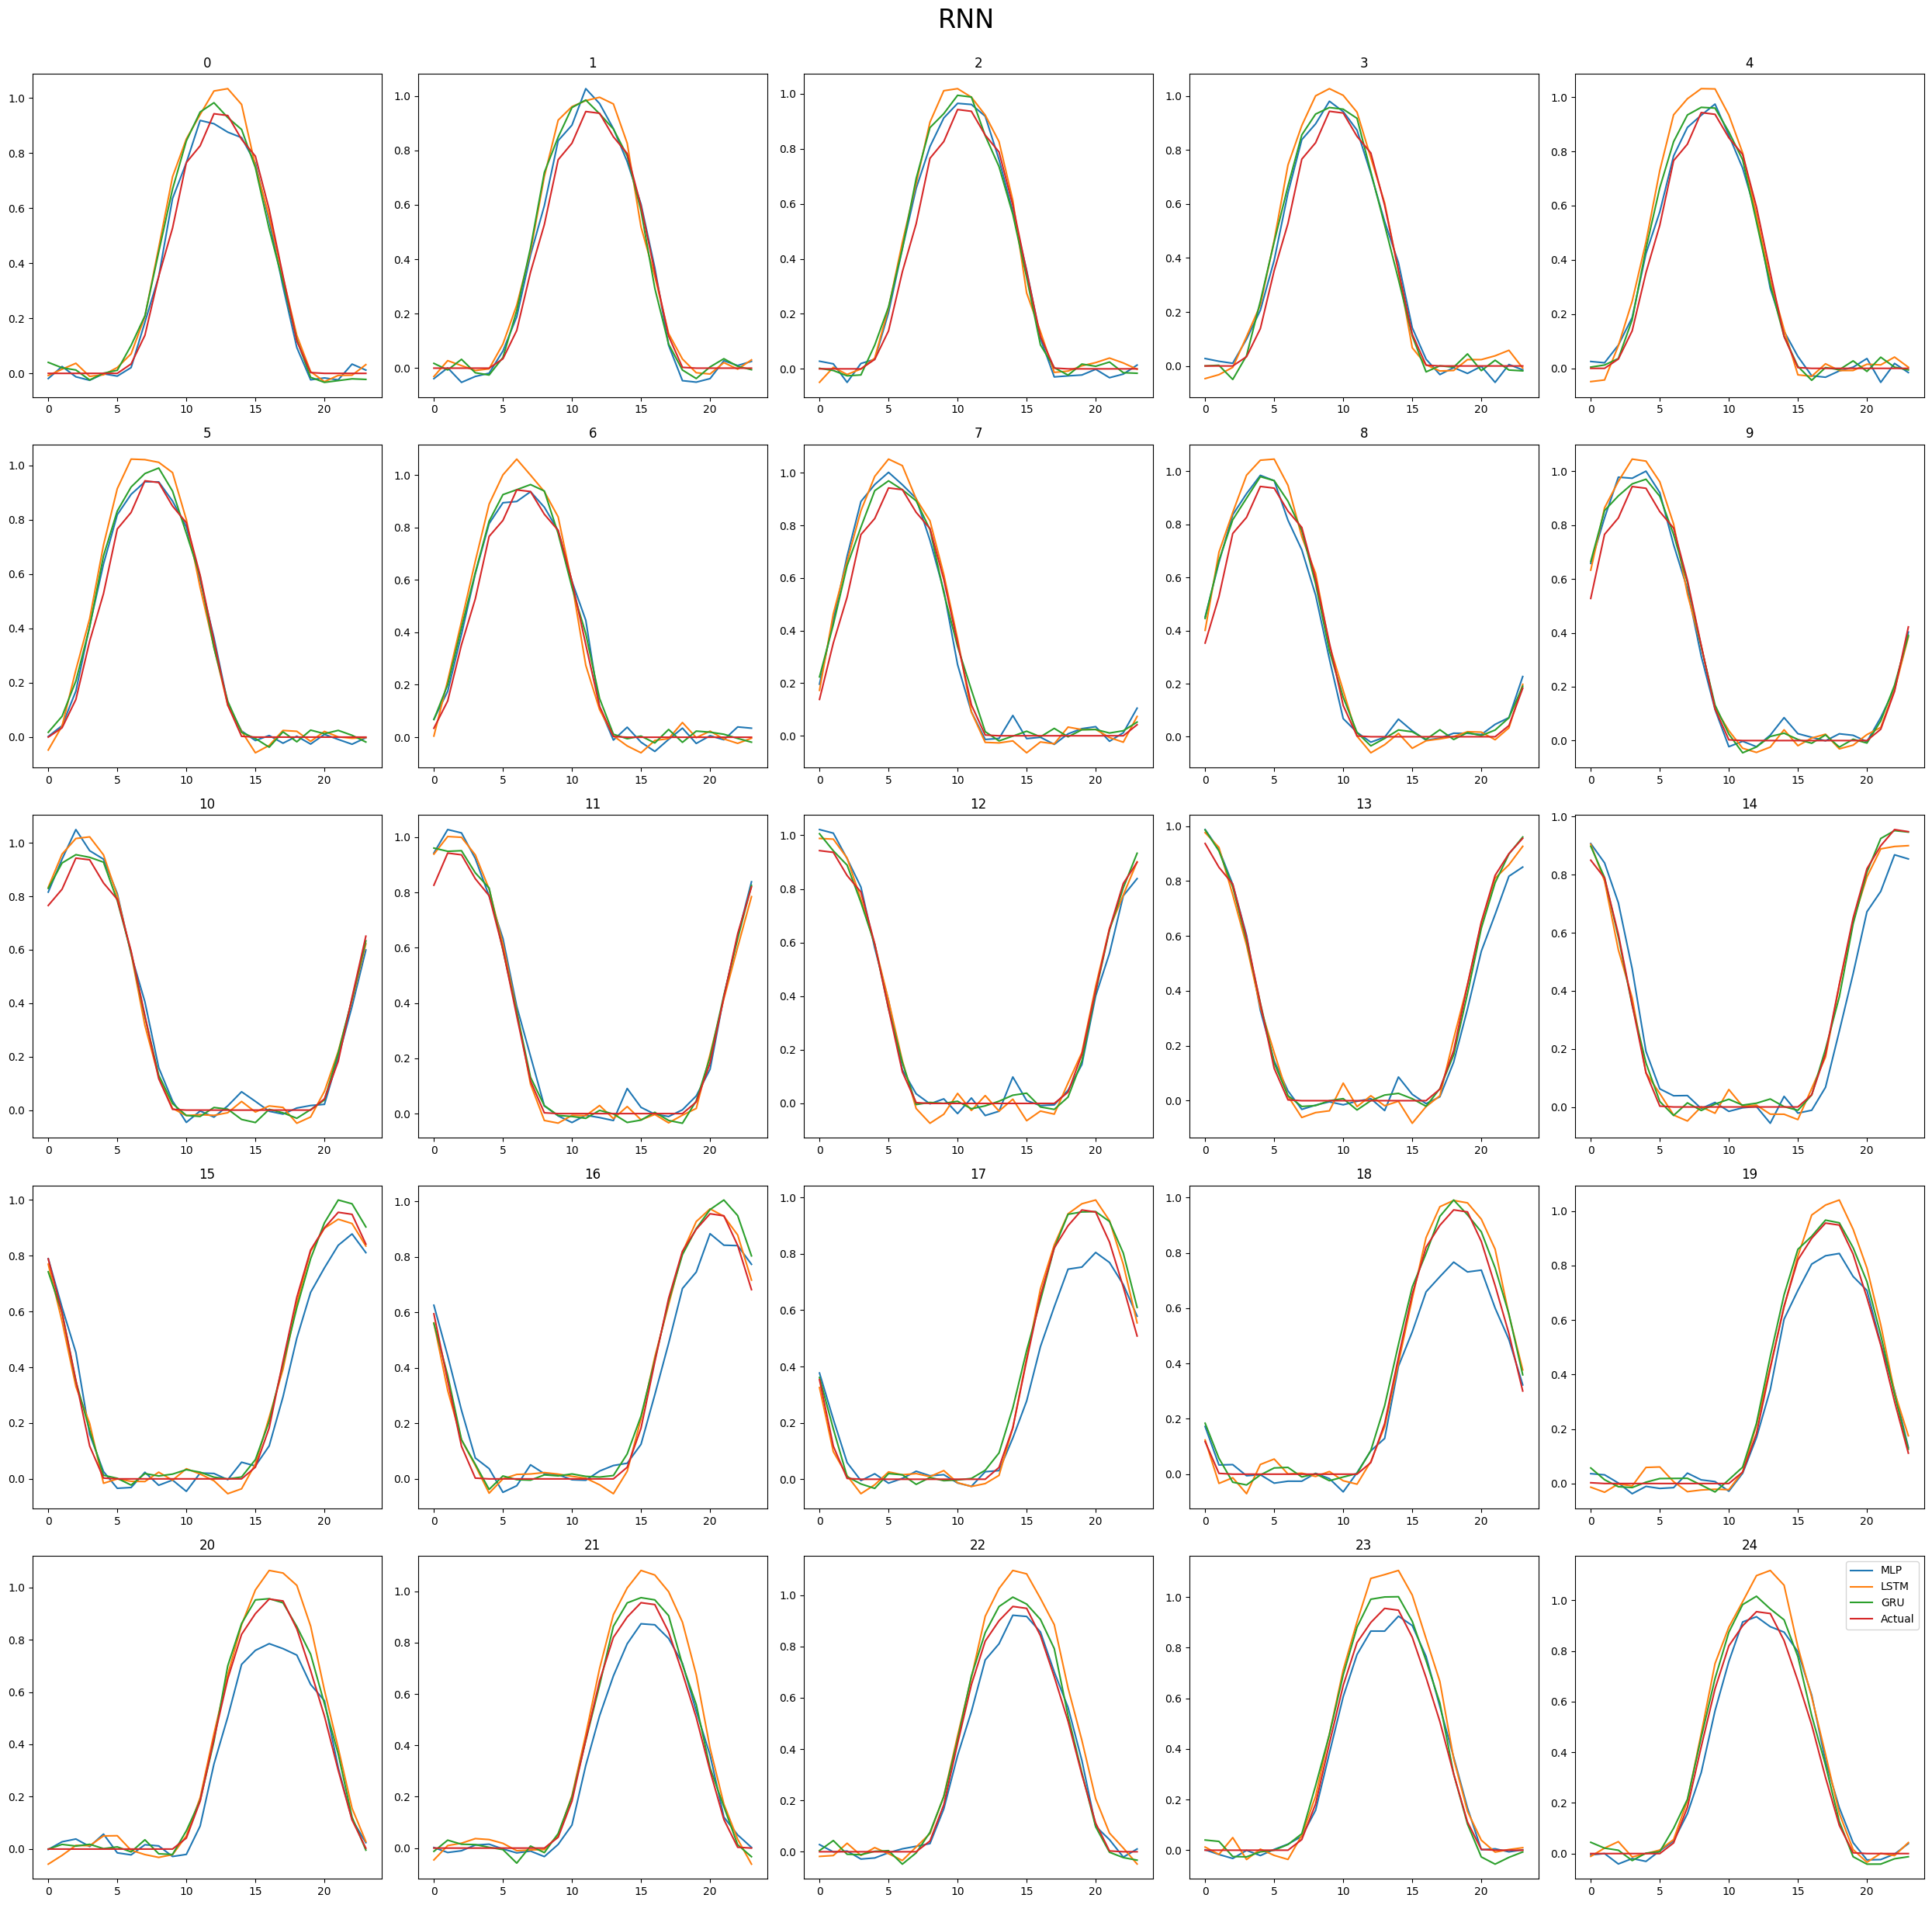

In [7]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.flatten()

for i in range(len(Y_test)):
    ax = axs[i]
    ax.plot(solar_mlp[i], label="MLP")
    ax.plot(solar_lstm[i], label="LSTM")
    ax.plot(solar_gru[i], label="GRU")
    ax.plot(Y_test[i, :, 1], label="Actual")
    ax.title.set_text(i)

fig.suptitle("RNN", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.legend()
plt.show()

In [8]:
rmse = 0
for i in range(len(carbon_lstm)):
    #print(f'pred={i}, num = {sqrt(mean_squared_error(predictions_2[i][0], Y_val[i, :, 1]))}')
    rmse += sqrt(mean_squared_error(carbon_lstm[i], Y_test[i, :, 0]))

rmse /= len(carbon_lstm)    
print(f"RMSE for {columns_to_predict[1]} = {rmse}")

rmse = 0
for i in range(len(solar_lstm)):
    #print(f'pred={i}, num = {sqrt(mean_squared_error(predictions_1[i][0], Y_val[i, :, 0]))}')
    rmse += sqrt(mean_squared_error(solar_lstm[i], Y_test[i, :, 1]))

rmse /= len(solar_lstm)    
print(f"RMSE for {columns_to_predict[1]} = {rmse}")

RMSE for Avg solar generation = 0.12928722844756912
RMSE for Avg solar generation = 0.0594736639187891


In [9]:
print(carbon_lstm)

          0         1         2         3         4         5         6   \
0   0.322625  0.283766  0.261381  0.243292  0.240131  0.256516  0.289512   
1   0.238519  0.202941  0.194240  0.199984  0.223099  0.259735  0.316785   
2   0.178182  0.150409  0.148180  0.158964  0.188033  0.238968  0.316949   
3   0.136572  0.125149  0.135721  0.157006  0.194024  0.250439  0.331598   
4   0.151637  0.154228  0.175821  0.207623  0.254581  0.316213  0.389154   
5   0.134088  0.154953  0.195047  0.244055  0.304842  0.375709  0.444708   
6   0.173486  0.202228  0.243107  0.288117  0.341906  0.396623  0.451326   
7   0.163781  0.198779  0.247647  0.298702  0.359472  0.423058  0.478388   
8   0.201804  0.248477  0.305061  0.360474  0.419579  0.471522  0.505777   
9   0.257886  0.303544  0.352489  0.395507  0.438567  0.481604  0.506774   
10  0.307545  0.340639  0.375431  0.405299  0.439035  0.478333  0.510085   
11  0.321358  0.362685  0.405227  0.438618  0.471694  0.503449  0.521734   
12  0.337833

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24


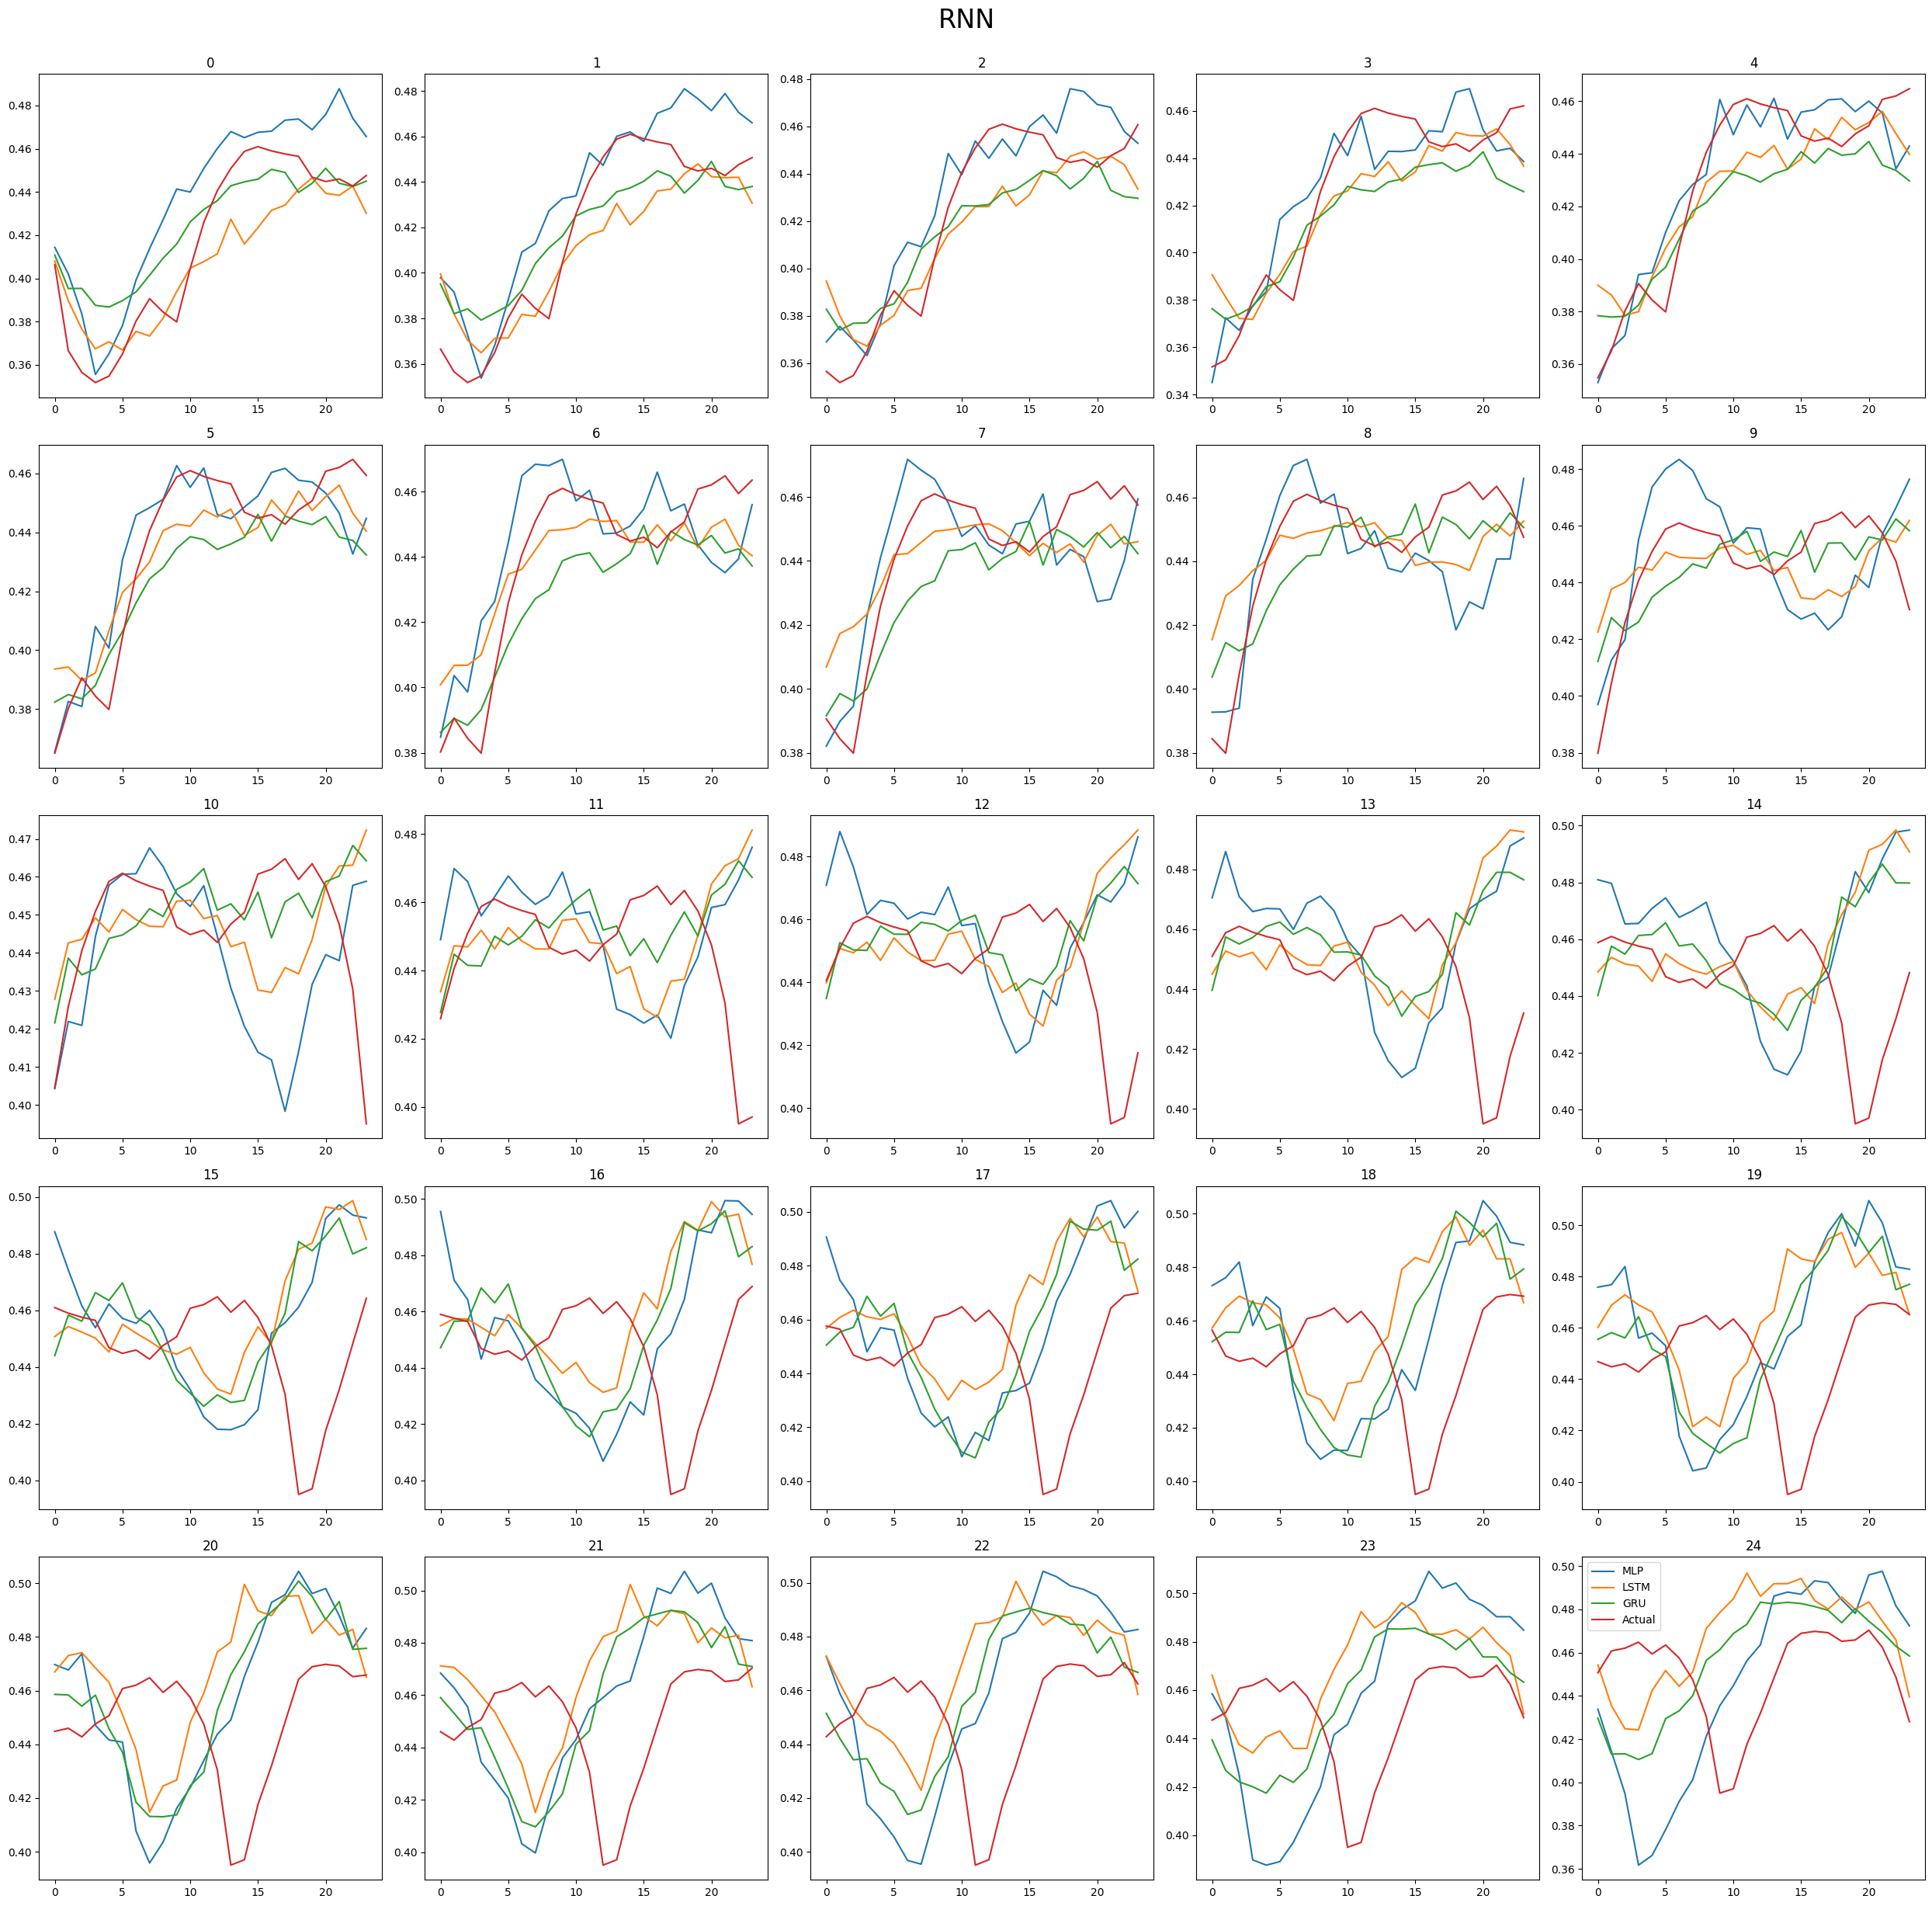

In [10]:
carbon_max = 0.5560628544361648
carbon_min = 0.337515252471314
solar_max = 703.628269052724
solar_min = 0.0

for i in range(len(Y_test)):
    print(i)
    carbon_mlp[i] = carbon_mlp[i] * (carbon_max - carbon_min) + carbon_min
    carbon_lstm[i] = carbon_lstm[i] * (carbon_max - carbon_min) + carbon_min
    carbon_gru[i] = carbon_gru[i] * (carbon_max - carbon_min) + carbon_min
    solar_mlp[i] = solar_mlp[i] * (solar_max - solar_min) + solar_min
    solar_lstm[i] = solar_lstm[i] * (solar_max - solar_min) + solar_min
    solar_gru[i] = solar_gru[i] * (solar_max - solar_min) + solar_min
    Y_test[i, :, 0] = Y_test[i, :, 0] * (carbon_max - carbon_min) + carbon_min
    Y_test[i, :, 1] = Y_test[i, :, 1] * (solar_max - solar_min) + solar_min


fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.flatten()

for i in range(len(Y_test)):
    ax = axs[i]
    ax.plot(carbon_mlp[i], label="MLP")
    ax.plot(carbon_lstm[i], label="LSTM")
    ax.plot(carbon_gru[i], label="GRU")
    ax.plot(Y_test[i, :, 0], label="Actual")
    ax.title.set_text(i)

fig.suptitle("RNN", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.legend()
plt.show()



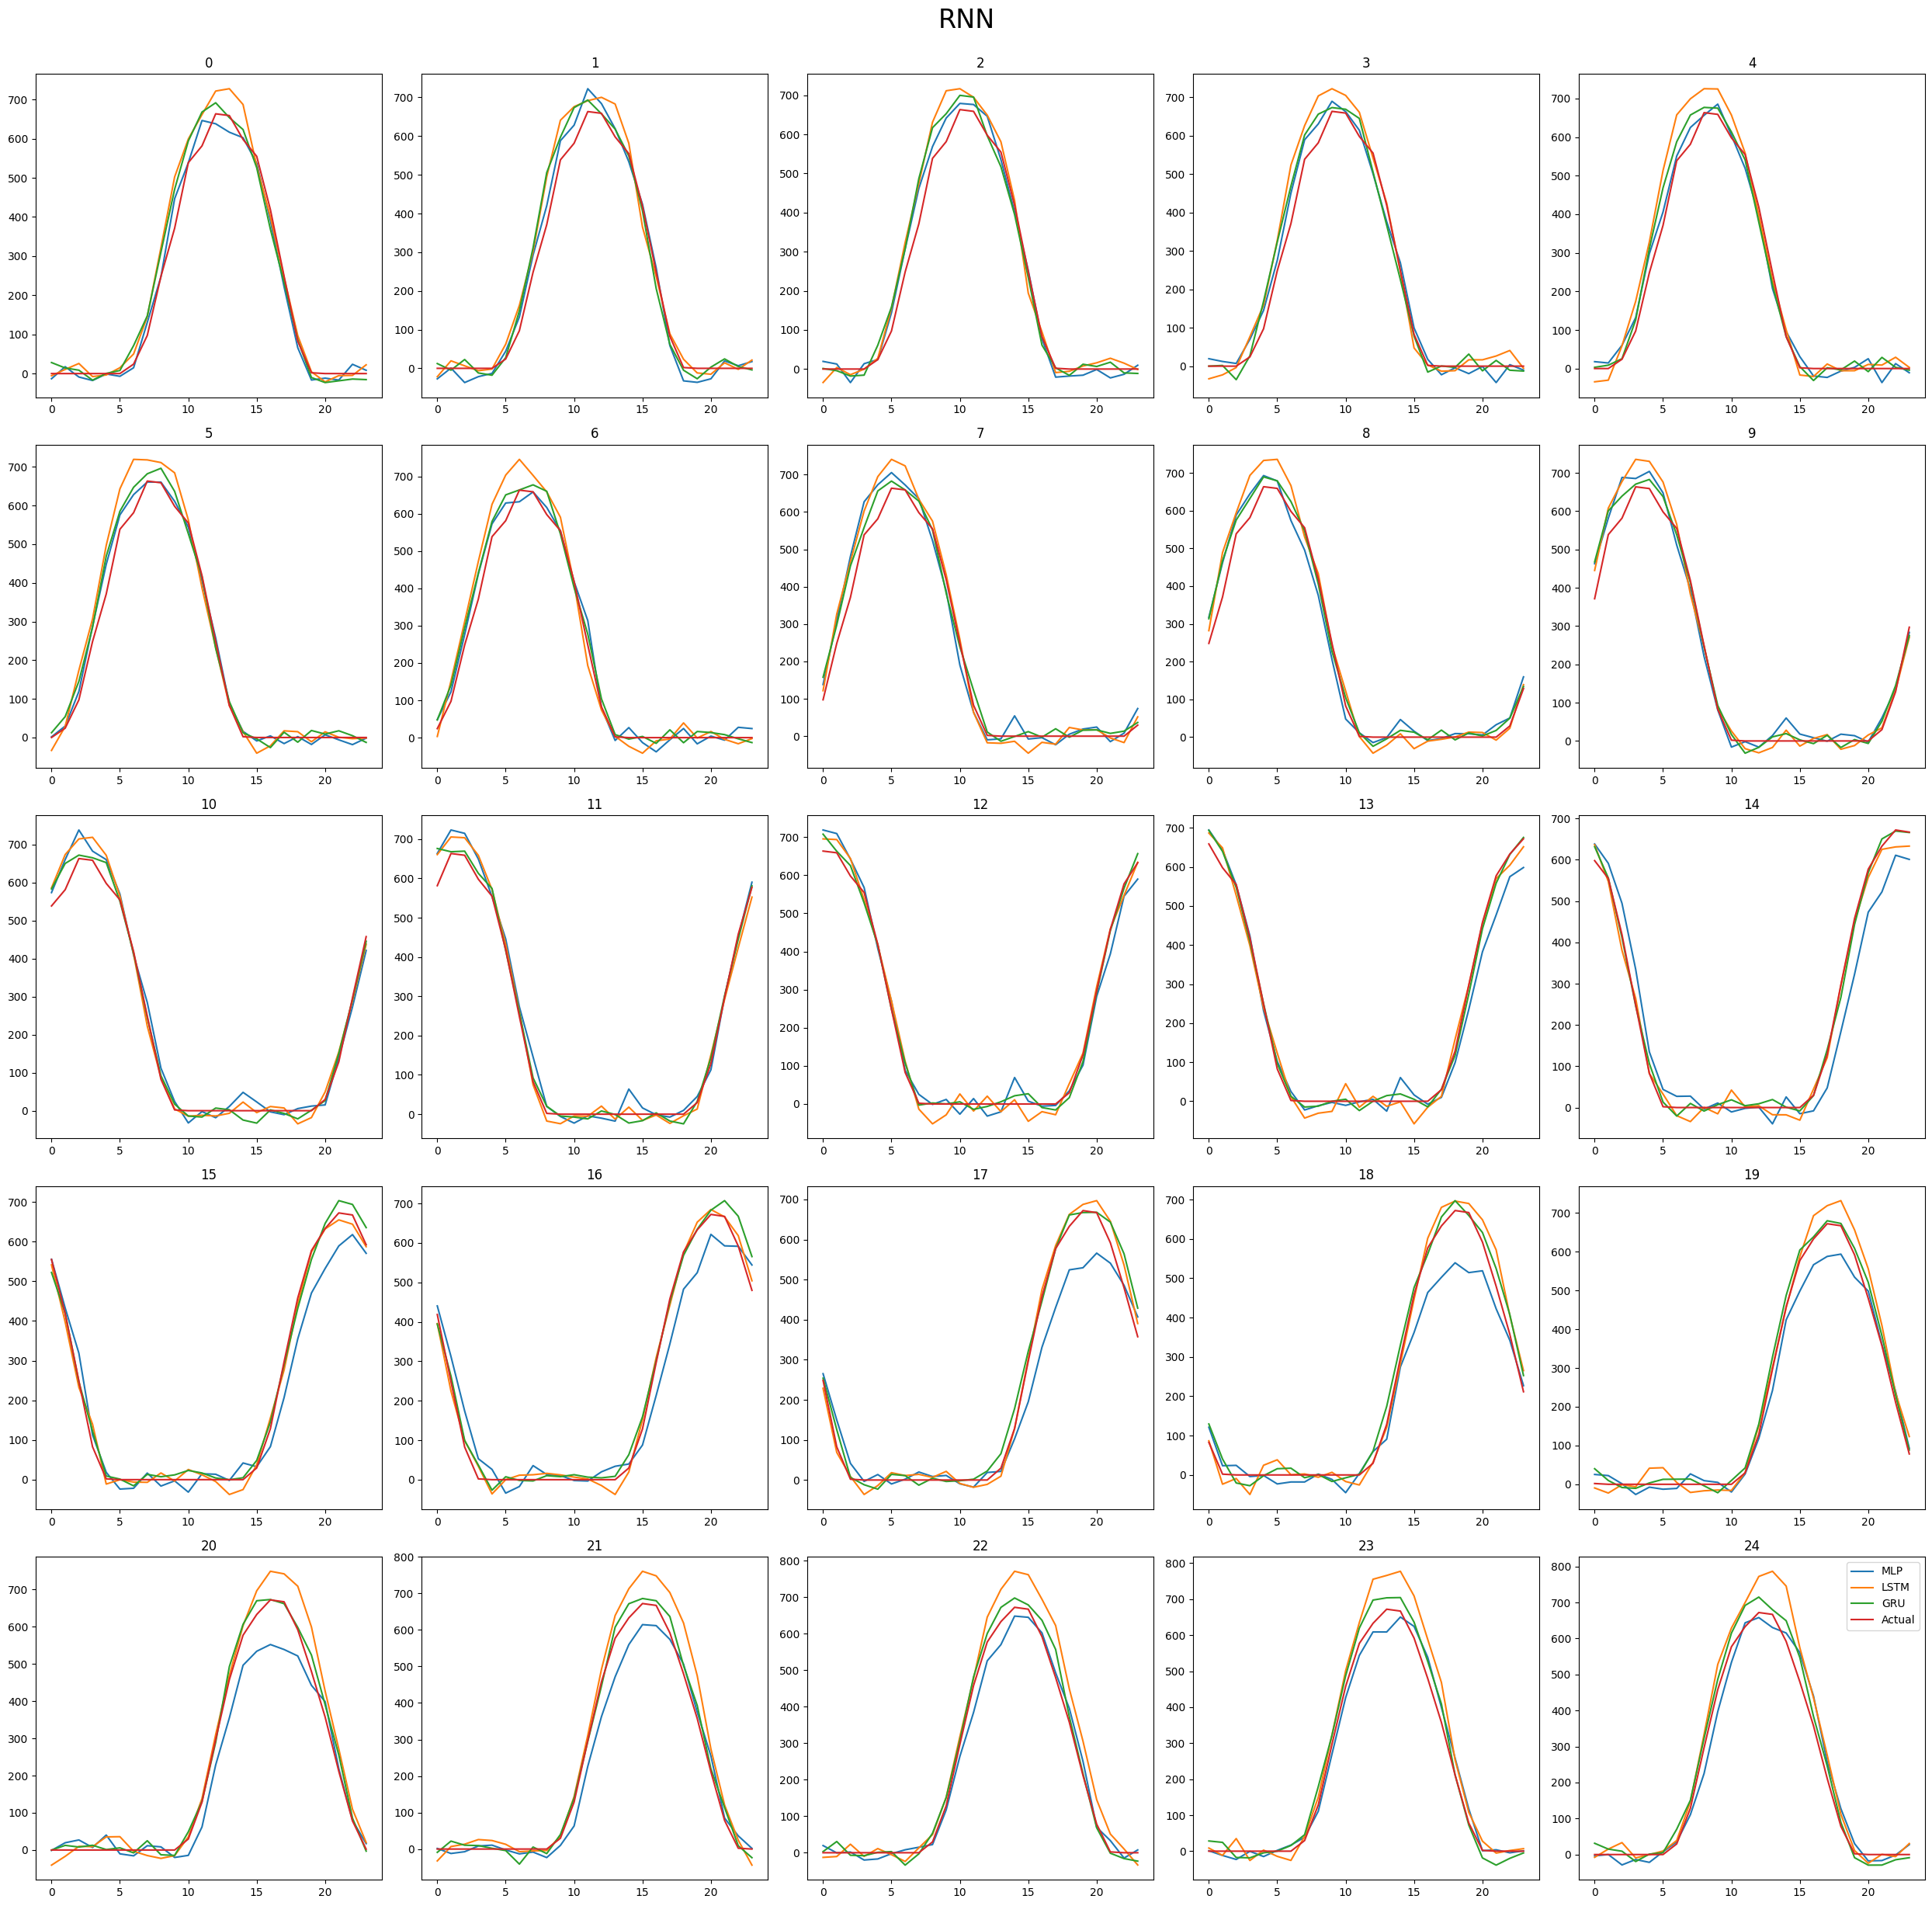

In [11]:
fig, axs = plt.subplots(5, 5, figsize=(25, 25))
axs = axs.flatten()

for i in range(len(Y_test)):
    ax = axs[i]
    ax.plot(solar_mlp[i], label="MLP")
    ax.plot(solar_lstm[i], label="LSTM")
    ax.plot(solar_gru[i], label="GRU")
    ax.plot(Y_test[i, :, 1], label="Actual")
    ax.title.set_text(i)

fig.suptitle("RNN", fontsize=24)
plt.tight_layout(rect=[0, 0, 1, 0.98])
plt.legend()
plt.show()

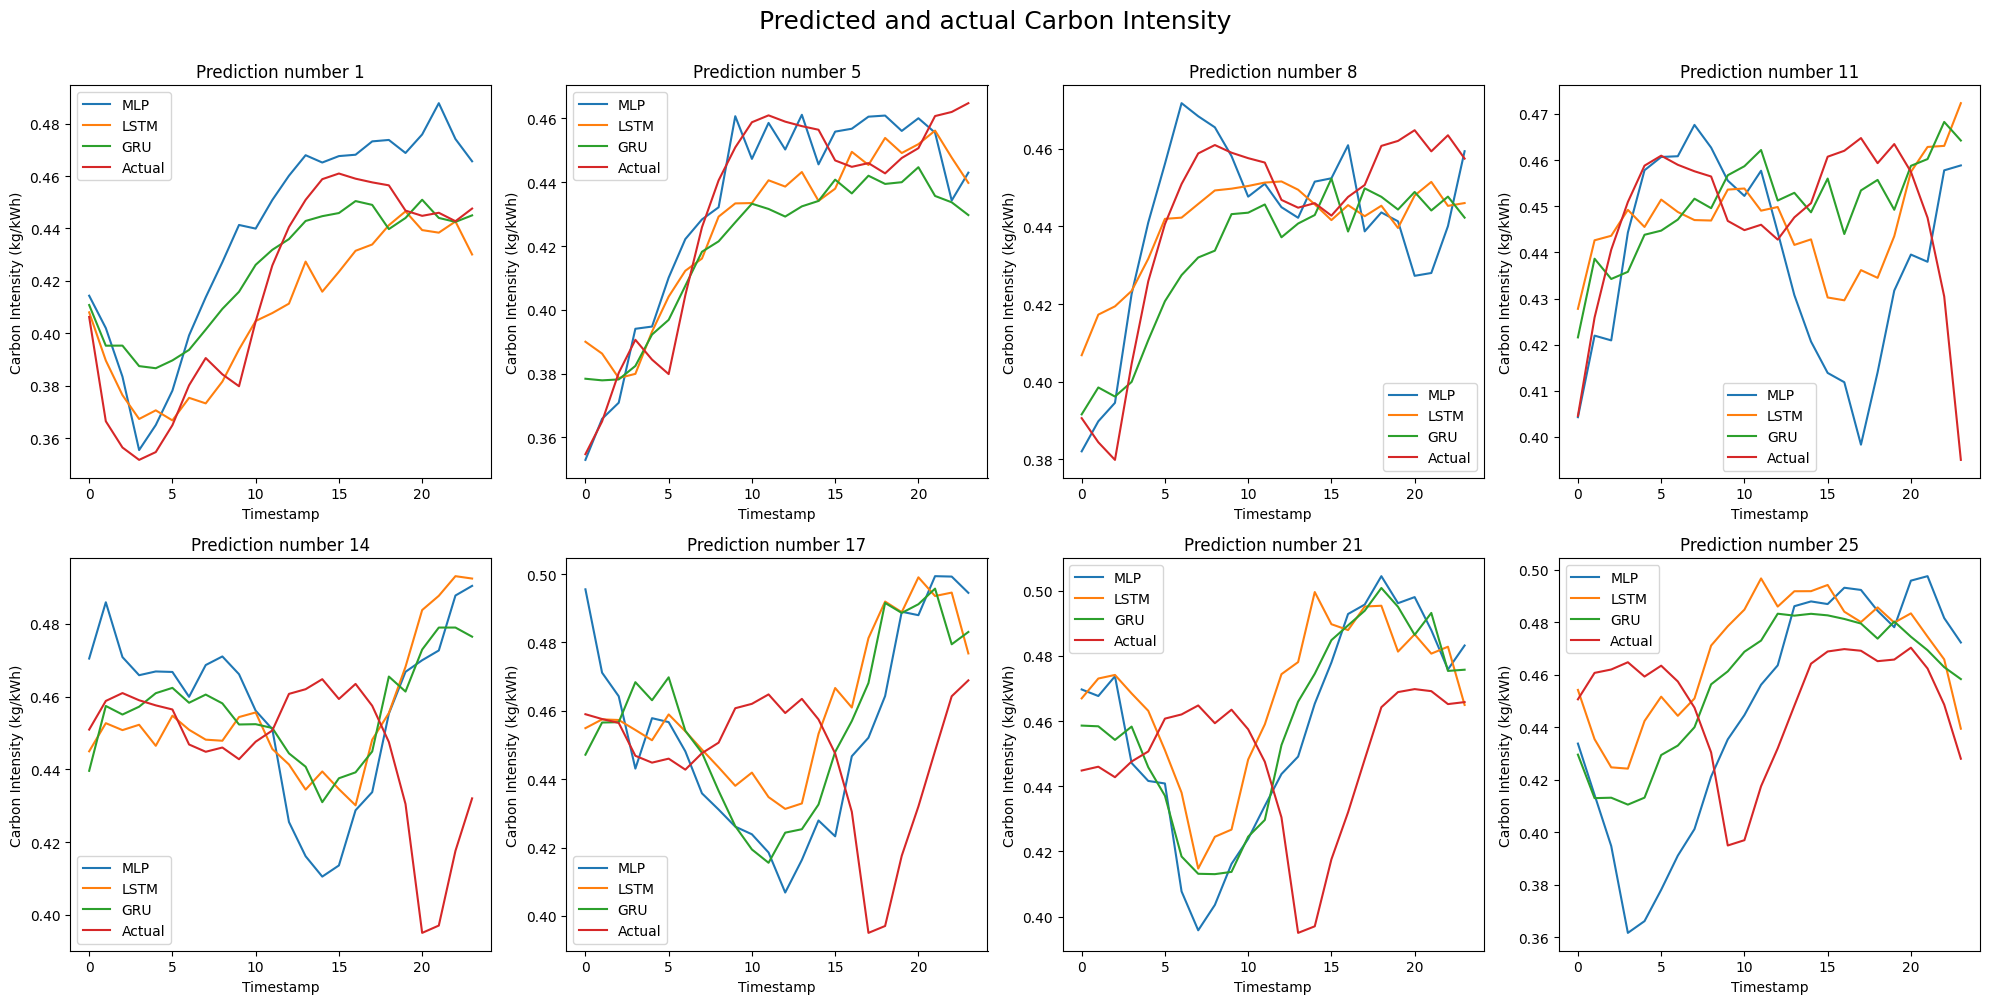

In [12]:
plt.figure(figsize=(20, 10))

plots = [0, 4, 7, 10, 13, 16, 20, 24]
i = 1

for num in plots:
    plt.subplot(2, 4, i)
    i += 1
    plt.plot(carbon_mlp[num], label="MLP")
    plt.plot(carbon_lstm[num], label="LSTM")
    plt.plot(carbon_gru[num], label="GRU")
    plt.plot(Y_test[num, :, 0], label="Actual")
    plt.xlabel('Timestamp')
    plt.ylabel('Carbon Intensity (kg/kWh)')
    plt.legend()
    plt.title(f'Prediction number {num+1}')

plt.suptitle('Predicted and actual Carbon Intensity', fontsize=18, y=1)
plt.tight_layout()
plt.show()

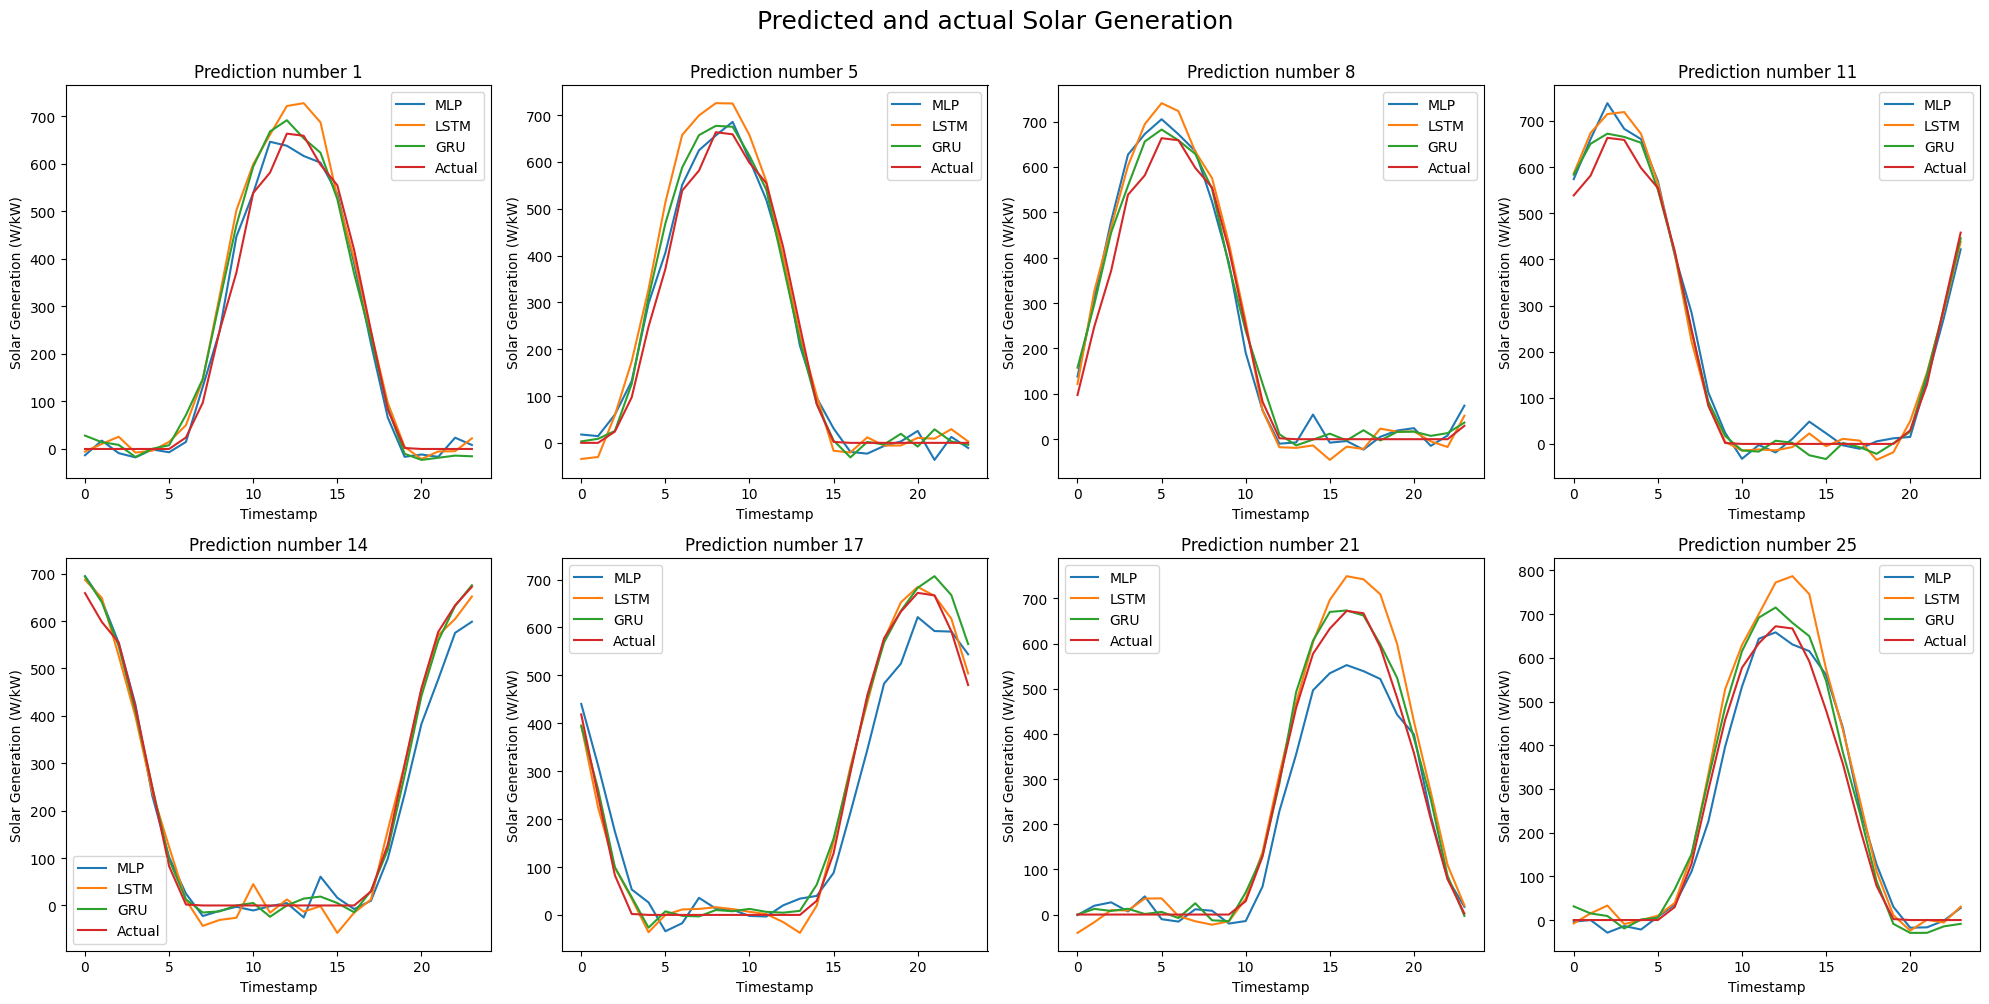

In [13]:
plt.figure(figsize=(20, 10))

plots = [0, 4, 7, 10, 13, 16, 20, 24]
i = 1

for num in plots:
    plt.subplot(2, 4, i)
    i += 1
    plt.plot(solar_mlp[num], label="MLP")
    plt.plot(solar_lstm[num], label="LSTM")
    plt.plot(solar_gru[num], label="GRU")
    plt.plot(Y_test[num, :, 1], label="Actual")
    plt.xlabel('Timestamp')
    plt.ylabel('Solar Generation (W/kW)')
    plt.legend()
    plt.title(f'Prediction number {num+1}')

plt.suptitle('Predicted and actual Solar Generation', fontsize=18, y=1)
plt.tight_layout()
plt.show()